In [1]:
import networkx as nx
from tqdm import tqdm
from collections import deque
import matplotlib.pyplot as plt

In [2]:
def readGraphFromFile(filename):
     return nx.read_graphml(filename)

In [3]:
def drawGraph(graph):
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=400, font_size=10)
    plt.show()

In [4]:
def longestSimplePath(graph):
    longestPath = []

    totalNodes = len(graph)
    updateInterval = max(totalNodes / 100, 1)

    # Explore each node as a starting point using a stack
    with tqdm(total=totalNodes) as pbar:
        for node in nx.nodes(graph):
            stack = [(node, [node])]  # (node, path to node)
            while stack:
                currentNode, currentPath = stack.pop()
                if len(currentPath) > len(longestPath):
                    longestPath = currentPath[:]

                for neighbor in graph[currentNode]:
                    if neighbor not in currentPath:
                        newPath = currentPath + [neighbor]
                        stack.append((neighbor, newPath))
        
            pbar.update()  # Update progress bar after exploring each starting node

    return longestPath, pbar.format_meter(totalNodes, totalNodes, pbar.format_dict['elapsed']), pbar.format_dict['elapsed'], totalNodes


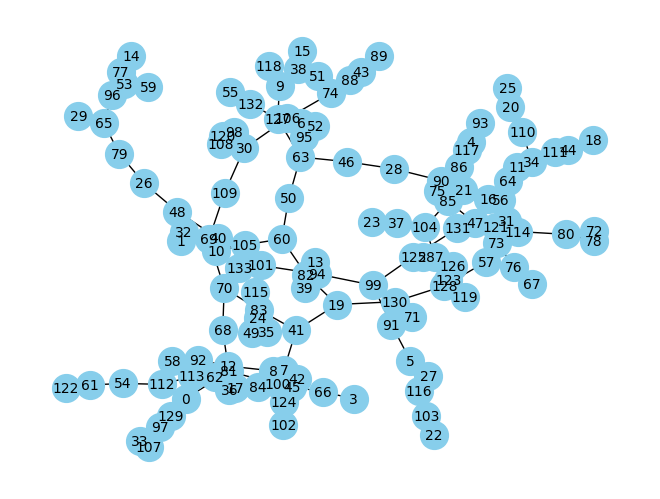

100%|██████████| 134/134 [00:00<00:00, 14885.24it/s]

Elements of longest simple path: ['10', '105', '60', '50', '63', '46', '28', '90', '16', '114', '57', '128', '130', '19', '41', '83', '70', '68', '81', '0', '112', '113', '12', '92', '58']
Longest simple path:  25
Elapsed time: 0.009002208709716797s


In [6]:
filename = 'test1.graphml'
printname = 'test1v1.txt'
graph = readGraphFromFile(filename) 
drawGraph(graph)
solution, barProgress, totalTime, iters = longestSimplePath(graph)
#print("Graph:", graph)
with open(printname, 'w') as f:
    f.write("Elements of longest simple path:\n")
    f.writelines(str(node) + " " for node in solution)
    f.write("\nLongest simple path length: " + str(len(solution)))
    f.write(f"\nNumber of iterations: {iters}")
    f.write(f"\nElapsed time: {totalTime}s")
print("Elements of longest simple path:", solution)
print("Longest simple path: ", len(solution))
print(f"Elapsed time: {totalTime}s")